In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math

In [601]:
#Part a
# Initialize a value of x0 
x= x0
x0= 0 

# Define the data
results = [1]
num_accept = 0
x_prev = results[-1]
N =10000
s = 1

#defining the target distribution
def target(x): 
    return 0.5*np.exp(-np.abs(x))

#calculate probability of accepting x_new
def accept_ratio(x_new, x_prev):
    return target(x_new)/target(x_prev)

# Define parameters
N = 10000
burn_in = 1000


# Create the Metropolis Hastings loop

for i in range(N):
    # Propose a new value of x randomly from a normal distribution between mean x[i-1] and s
    x_new = np.random.normal(np.mean(results[-1]),1)
    x_prev = results[-1]
    # Define acceptance probability
    A = accept_ratio(x_new, x_prev)
    # Draw random sample to compare A with u 
    u = np.random.uniform(0,1)
    # Using log value, if A is greater than u, accept the new value of x (set x0 = x_new) 
    if math.log(u) < math.log(A):
        x = x_new  
        results.append(x_new)
        num_accept +=1
    #else set x as previous value
    else:
        results.append(results[-1])  
        
#removing burn in        
results = results[burn_in+1:]
len(results)

9000

In [605]:
# Monte carlo estimates of the mean
mean_1 = np.mean(results)
mean_1

-0.0011155421895001308

In [606]:
# Monte carlo estimates of the standard deviation
stdev_1 = np.std(results)
stdev_1

1.4876521440155888

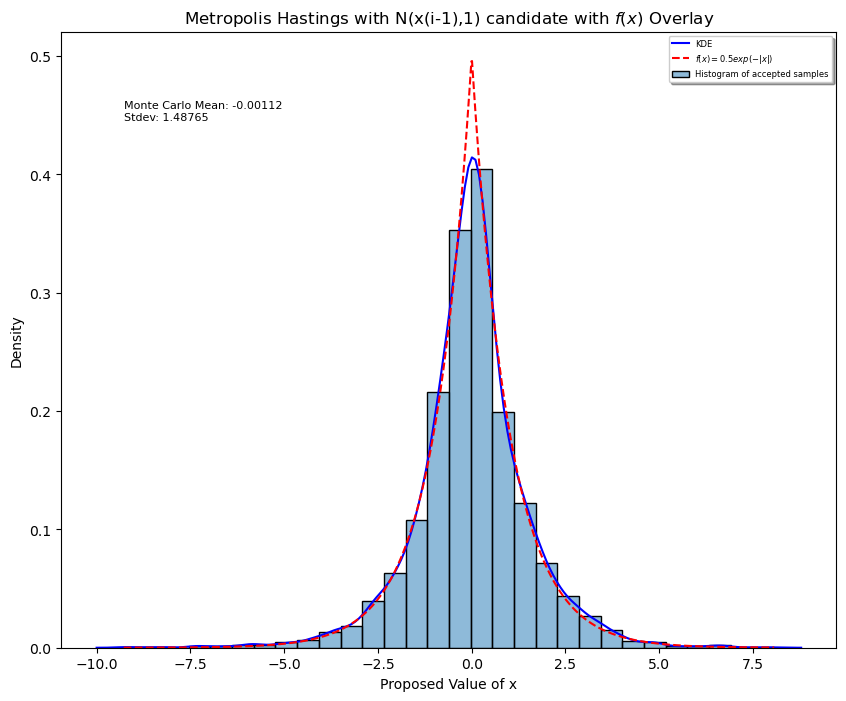

In [630]:
#generate graphs

plt.figure(figsize=(10, 8))

sns.histplot(results, stat='density', bins=30, alpha=0.5, label='Histogram of accepted samples') #Use the generated samples to construct a histogram 
sns.kdeplot(results, color='blue', label='KDE') #kernel density plot in the same figure
x_vals = np.linspace(min(results), max(results), 1000) #generates an array of 1000 evenly spaced points 
plt.plot(x_vals, target(x_vals), 'r--', label='$f(x) = 0.5exp(-|x|)$') #Overlay a graph of target distribution
offset = 0.05
y_position = max(target(x_vals)) - offset
plt.text(x_vals[0], y_position, f'Monte Carlo Mean: {mean_1:.5f}\nStdev: {stdev_1:.5f}', fontsize=8)
plt.title('Metropolis Hastings with N(x(i-1),1) candidate with $f(x)$ Overlay')
plt.ylabel('Density')
plt.xlabel('Proposed Value of x')
plt.legend(loc='upper right', shadow=True, fontsize=6)

plt.savefig('MCMC1.png')

